In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

import pandas as pd
import numpy as np

from imblearn.under_sampling import NearMiss
import os
from tensorflow.keras.utils import Sequence



import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools


import shutil
import random
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
keras = tf.compat.v2.keras
Sequence = keras.utils.Sequence





In [2]:
data = pd.read_csv("bankruptcy_data.csv",sep=",")
data.head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126,0.014,0.040,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368,0.328,0.567,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233,0.147,0.053,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [4]:
data.isnull().values.any()

True

In [5]:
np.nan_to_num(data)

array([[ 1.979e+03,  9.800e-01,  1.580e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.980e+03,  9.800e-01,  1.410e+00, ...,  1.400e-02,  4.000e-02,
         0.000e+00],
       [ 1.981e+03,  8.700e-01,  3.100e-01, ...,  3.280e-01,  5.670e-01,
         0.000e+00],
       ...,
       [ 2.011e+03,  9.240e-01, -1.600e-02, ..., -2.000e-02, -1.050e-01,
         0.000e+00],
       [ 2.012e+03,  7.880e-01, -1.330e-01, ..., -1.710e-01, -5.900e-02,
         0.000e+00],
       [ 2.013e+03,  8.850e-01, -6.480e-01, ...,  6.500e-02,  6.300e-02,
         1.000e+00]])

In [6]:
data.isnull().values.any()

True

In [7]:
data.isnull().head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [9]:
data.dropna(how='any').shape

(81204, 15)

In [10]:
data.isnull().values.any()

True

In [1]:
# fill missingdata values with mean column values
data.fillna(data.mean(), inplace=True)

NameError: name 'data' is not defined

In [12]:
# count the number of NaN values in each column
print(data.isnull().sum())

Data Year - Fiscal    0
Tobin's Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64


In [13]:
data.isnull().values.any()

False

In [14]:
data.shape

(92872, 15)

In [15]:
training = data[0:90000]
testing = data[90000:]

In [16]:
print(training.shape)
print(testing.shape)

(90000, 15)
(2872, 15)


In [17]:
#Create independent and Dependent Features
columns = training.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "BK"
# Define a random state 
state = np.random.RandomState(42)
X = training[columns]
Y = training[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(90000, 15)
(90000,)


In [18]:
#Create independent and Dependent Features
columns = testing.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "BK"
# Define a random state 
state = np.random.RandomState(42)
XT = testing[columns]
YT = testing[target]
# Print the shapes of X & Y
print(XT.shape)
print(YT.shape)

(2872, 15)
(2872,)


Text(0.5, 0, 'BK')

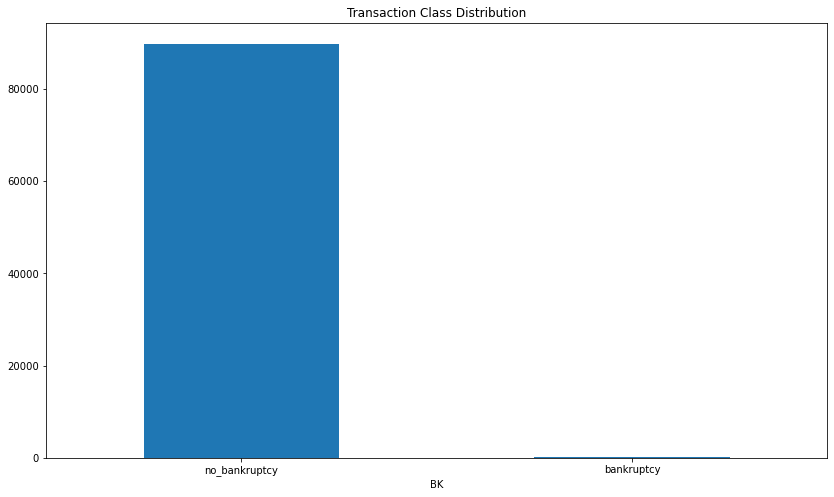

In [24]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["no_bankruptcy", "bankruptcy"]


count_classes = pd.value_counts(training['BK'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("BK")


In [25]:
# summarize class distribution
counter = Counter(Y)
print(counter)

Counter({0: 89842, 1: 158})


In [26]:

from imblearn.under_sampling import NearMiss
# Implementing Undersampling for Handling Imbalanced 
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_res,y_res = undersample.fit_resample(X,Y)

In [27]:
X_res.shape,y_res.shape

((316, 15), (316,))

In [28]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 89842, 1: 158})
Resampled dataset shape Counter({0: 158, 1: 158})


In [39]:
train_x = np.asarray(X_res)
train_y = np.asarray(y_res)
test_x = np.asarray(XT)
test_y = np.asarray(YT)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg_clf = LogisticRegression()

logreg_clf.fit(train_x, train_y)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [66]:
predictions=logreg_clf.predict(test_x)

predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [67]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

In [1]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'plt' is not defined

In [69]:
accuracy_score(test_y,predictions.round())  

0.7155292479108635

In [70]:
from sklearn.metrics import f1_score


f1_score(test_y, predictions, average='macro')

0.6459753570348175

In [71]:
from sklearn.metrics import precision_score


precision_score(test_y, predictions, average='macro' )


0.6603627649460823

In [72]:
from sklearn.metrics import recall_score

recall_score(test_y, predictions,average='macro' )

0.8253195792880259

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

liner_da = LinearDiscriminantAnalysis()
liner_da .fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [62]:


predictions=liner_da.predict(test_x)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

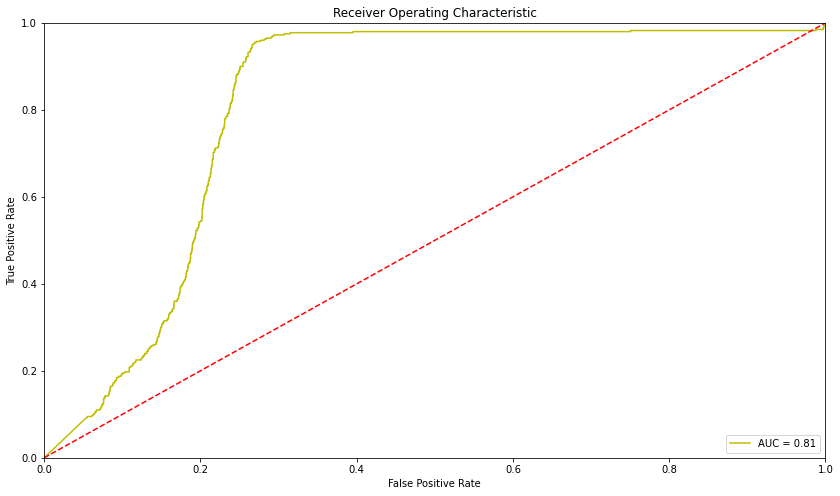

In [73]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
accuracy_score(test_y,predictions.round())  

0.7155292479108635

In [75]:
from sklearn.metrics import f1_score


f1_score(test_y, predictions, average='macro')

0.6459753570348175

In [76]:
from sklearn.metrics import precision_score


precision_score(test_y, predictions, average='macro' )


0.6603627649460823

In [77]:
from sklearn.metrics import recall_score

recall_score(test_y, predictions,average='macro' )

0.8253195792880259

In [78]:
from sklearn.neighbors import KNeighborsClassifier

k_nn = KNeighborsClassifier()

k_nn .fit(train_x, train_y)


KNeighborsClassifier()

In [79]:
predictions=k_nn.predict(test_x)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [85]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

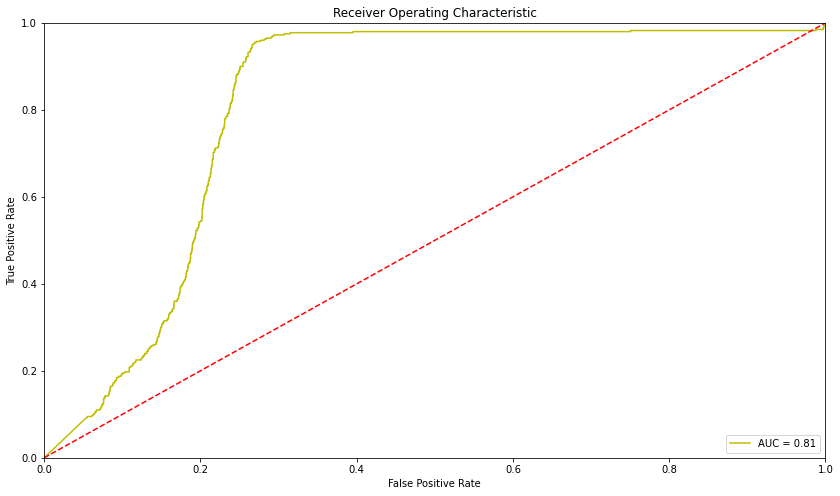

In [84]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
accuracy_score(test_y,predictions.round())  

0.27506963788300837

In [82]:
from sklearn.metrics import f1_score


f1_score(test_y, predictions, average='macro')

0.2746630178462255

In [81]:
from sklearn.metrics import precision_score


precision_score(test_y, predictions, average='macro' )


0.5334165280088741

In [80]:
from sklearn.metrics import recall_score

recall_score(test_y, predictions,average='macro' )

0.5380218446601942

In [86]:
from sklearn.naive_bayes import GaussianNB
G_NB = GaussianNB()

G_NB  .fit(train_x, train_y)


GaussianNB()

In [87]:
predictions=G_NB.predict(test_x)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [93]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

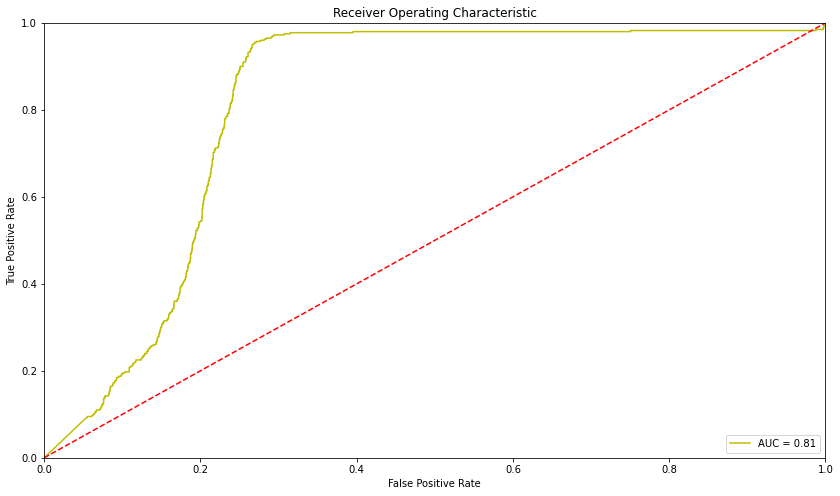

In [92]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
accuracy_score(test_y,predictions.round())

0.3635097493036212

In [90]:
from sklearn.metrics import f1_score


f1_score(test_y, predictions, average='macro')

0.3538028279963764

In [89]:
from sklearn.metrics import precision_score


precision_score(test_y, predictions, average='macro' )


0.5456995182657567

In [88]:
from sklearn.metrics import recall_score

recall_score(test_y, predictions,average='macro' )

0.5736812297734628

In [64]:
from sklearn.tree import DecisionTreeClassifier

D_Tree = DecisionTreeClassifier()

D_Tree  .fit(train_x, train_y)

DecisionTreeClassifier()

In [65]:
predictions=D_Tree.predict(test_x)
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [94]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

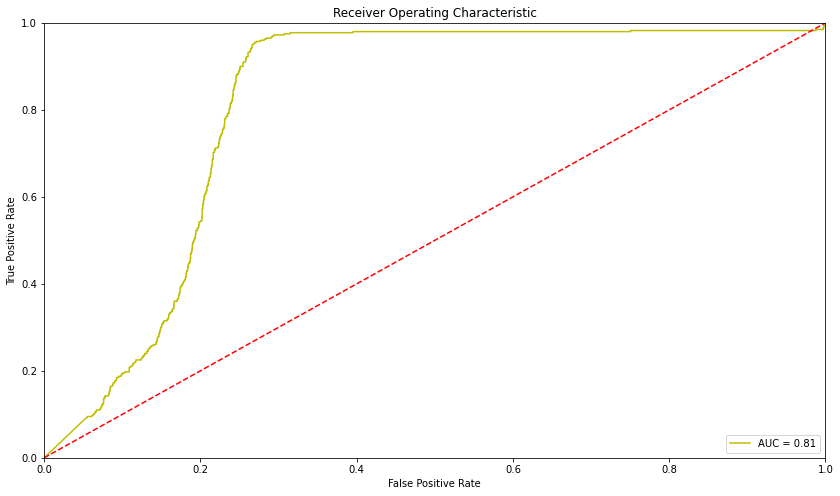

In [95]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
accuracy_score(test_y,predictions.round())

0.3635097493036212

In [97]:
from sklearn.metrics import f1_score


f1_score(test_y, predictions, average='macro')

0.3538028279963764

In [98]:
from sklearn.metrics import precision_score


precision_score(test_y, predictions, average='macro' )


0.5456995182657567

In [99]:
from sklearn.metrics import recall_score

recall_score(test_y, predictions,average='macro' )

0.5736812297734628

In [105]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

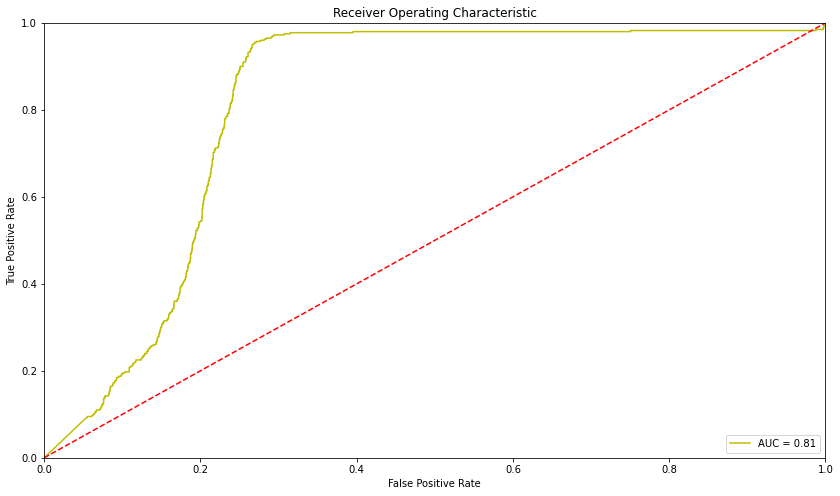

In [104]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [103]:
accuracy_score(test_y,predictions.round())

0.3635097493036212

In [102]:
from sklearn.metrics import f1_score


f1_score(test_y, predictions, average='macro')

0.3538028279963764

In [101]:
from sklearn.metrics import precision_score


precision_score(test_y, predictions, average='macro' )


0.5456995182657567

In [106]:
from sklearn.metrics import recall_score

recall_score(test_y, predictions,average='macro' )

0.5736812297734628

In [92]:
from sklearn.svm import SVC

Svm = SVC()

Svm  .fit(train_x, train_y)

SVC()

In [93]:
predictions=Svm.predict(test_x)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [113]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

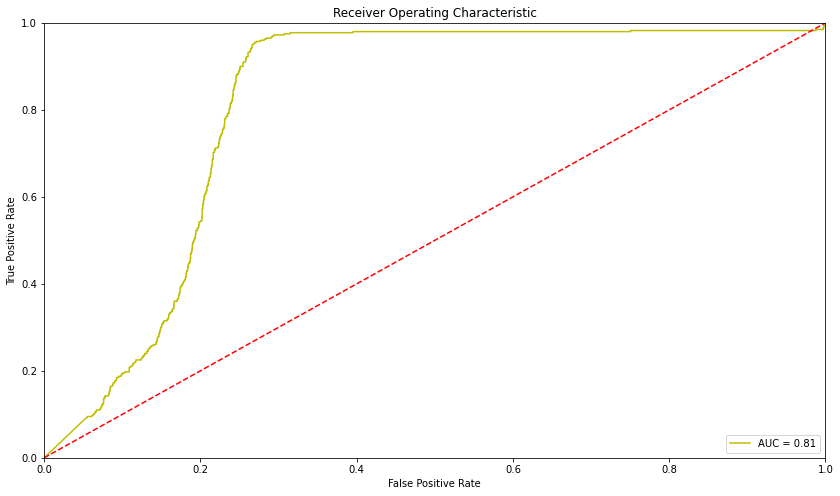

In [111]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [112]:
accuracy_score(test_y,predictions.round())

0.3635097493036212

In [108]:
from sklearn.metrics import f1_score


f1_score(test_y, predictions, average='macro')

0.3538028279963764

In [107]:
from sklearn.metrics import precision_score


precision_score(test_y, predictions, average='macro' )


0.5456995182657567

In [100]:
from sklearn.metrics import recall_score

recall_score(test_y, predictions,average='macro' )

0.5736812297734628

In [36]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
svm =SVC()
SVC_model = svm.SVC()

AttributeError: 'SVC' object has no attribute 'SVC'

In [81]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(15,)),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


In [82]:
from tensorflow.keras.optimizers import Adam


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [83]:
model.fit(x= train_x, y= train_y, validation_split=0.01, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 312 samples, validate on 4 samples
Epoch 1/30
312/312 - 1s - loss: 625.6111 - accuracy: 0.0000e+00 - val_loss: 539.4573 - val_accuracy: 0.0000e+00
Epoch 2/30
312/312 - 0s - loss: 556.1252 - accuracy: 0.0000e+00 - val_loss: 471.7296 - val_accuracy: 0.0000e+00
Epoch 3/30
312/312 - 0s - loss: 486.9062 - accuracy: 0.0000e+00 - val_loss: 405.3936 - val_accuracy: 0.0000e+00
Epoch 4/30
312/312 - 0s - loss: 418.7311 - accuracy: 0.0000e+00 - val_loss: 338.7326 - val_accuracy: 0.0000e+00
Epoch 5/30
312/312 - 0s - loss: 350.3918 - accuracy: 0.0000e+00 - val_loss: 272.6635 - val_accuracy: 0.0000e+00
Epoch 6/30
312/312 - 0s - loss: 282.7037 - accuracy: 0.0032 - val_loss: 205.5578 - val_accuracy: 0.0000e+00
Epoch 7/30
312/312 - 0s - loss: 215.5424 - accuracy: 0.0064 - val_loss: 138.6914 - val_accuracy: 0.0000e+00
Epoch 8/30
312/312 - 0s - loss: 149.0677 - accuracy: 0.0064 - val_loss: 73.9063 - val_accuracy: 0.0000e+00
Epoch 9/30
312/312 - 0s - loss: 83.9705 - accuracy: 0.0128 - val_loss: 10

In [84]:
model.evaluate(
    test_x, 
    test_y, 
    batch_size=32, 
    verbose=1, 
    sample_weight=None)

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[36.75140015162465, 0.69916433]

In [85]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[7.0232594e-01, 2.9767406e-01, 0.0000000e+00, ..., 1.1446109e-15,
        0.0000000e+00, 0.0000000e+00],
       [6.9037646e-01, 3.0962354e-01, 0.0000000e+00, ..., 7.8563947e-16,
        0.0000000e+00, 0.0000000e+00],
       [5.3143734e-01, 4.6856263e-01, 0.0000000e+00, ..., 1.5359183e-15,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999201e-01, 8.0328418e-06, 0.0000000e+00, ..., 3.4924867e-22,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.5533582e-08, 0.0000000e+00, ..., 6.0656230e-26,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [48]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [50]:

for i in rounded_predictions:
    print(i)

TypeError: 'numpy.int64' object is not iterable

In [88]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [89]:
cm = confusion_matrix(y_true= test_y, y_pred= rounded_predictions)

In [90]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Confusion matrix, without normalization
[[1821  608    1    3    0   33    2    4]
 [ 199  187    2    0    2    9    0    1]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


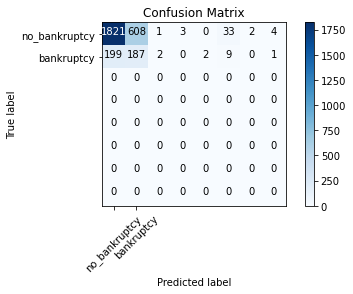

In [91]:
cm_plot_labels = ['no_bankruptcy','bankruptcy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [40]:
 from sklearn.metrics import average_precision_score
    
    precision_score(YT,predictions )

IndentationError: unexpected indent (<ipython-input-40-0cb3eabb65c2>, line 3)

In [30]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

In [31]:
probs = rf.predict_proba(XT)

In [32]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

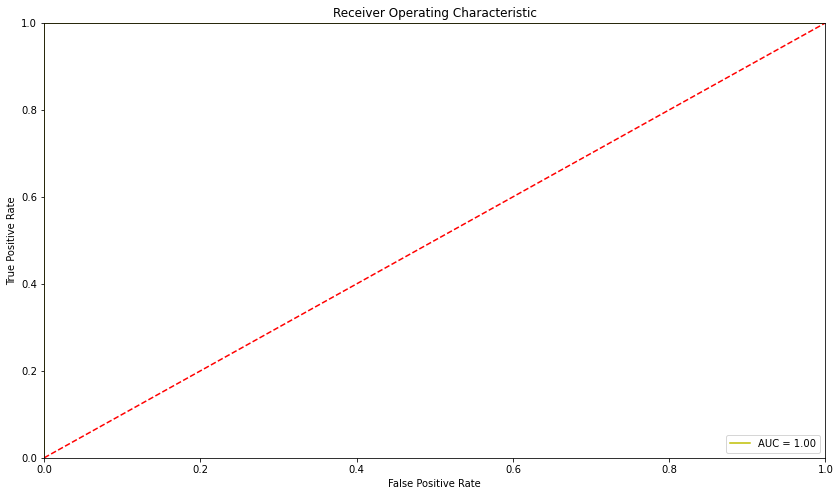

In [33]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
y_pred = rf.predict(XT)

In [35]:
from sklearn.metrics import precision_score


precision_score(YT, y_pred)

0.39331366764995085

In [36]:
from sklearn.metrics import recall_score

recall_score(YT, y_pred)

1.0

In [37]:
from sklearn.metrics import f1_score


f1_score(YT, y_pred)

0.5645730416372619

In [57]:
accuracy_score(test_y,y_pred.round())  

0.7851671309192201

In [54]:
models = []

models.append(('LR', LogisticRegression())

LR = linear_model.LinearRegression()
y_preds=LR.predict(test-x)
print(y_preds)

SyntaxError: invalid syntax (<ipython-input-54-907959475f15>, line 5)